In [25]:
import sys

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print(f"Python version: {sys.version}\nNumpy version: {np.__version__}\nMatplotlib version: {matplotlib.__version__}")

Python version: 3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:49:36) [Clang 16.0.6 ]
Numpy version: 1.26.4
Matplotlib version: 3.8.0


# Problem 1

Given data initialisation

In [26]:
N, p = 30, 20
np.random.seed(0)
X = np.random.randn(N, p)
Y = 2* np.random.randint(2, size=N) - 1

## SGD to solve logistic regression optimisation problem:
$$\underset{\theta \in \mathbb{R}^p}{\text{minimize}}\ \frac{1}{N}\sum^N_{i=1} \log\left(1+\exp\left(-Y_iX^\intercal_i\theta\right)\right)$$

In [27]:
def loss_func(X, Y, theta):
    return np.sum([np.log(1 + np.exp(-Y[i] * (X[i]@theta))) for i in range(N)])/N

def plot_loss(loss_array):
    """Plot the recorded loss (assumed per iteration)"""
    n = len(loss_array)
    plt.plot(range(n), loss_array, 'r')
    plt.plot(range(n), [0]*n, 'g--')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss over successive iterations')
    plt.show()

Optimised theta value:
 [ -0.77570138   2.86173946   1.21590316   9.94965039  -2.9936054
  -1.13142602  -8.15173642  -4.95363467   1.92154352   4.55013858
   9.88169659 -13.87835698  -1.32610624  -4.77907593   9.56740169
  10.65543315  -9.66038224   1.63332269  -1.01430889 -13.09286301]
Minimised value after 20000 iterations with learning rate alpha=0.2:
 0.033863386057970186


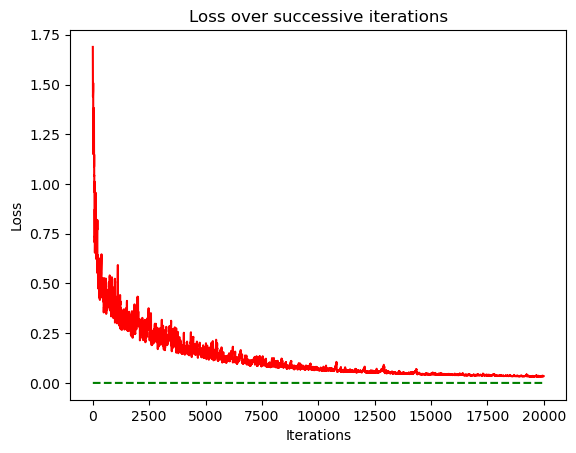

In [28]:
def log_reg_fi_grad(i, X, Y, t):
    z = np.exp(-Y[i] * (X[i]@t))
    return -(z / (1 + z)) * Y[i] * X[i]

K = 20000    # number of iterations
theta = np.random.randn(p) # randomly sampled initial theta
alpha = 0.2  # learning rate

loss = []
for _ in range(K):
    ind = np.random.randint(N)  # stochastically choose random index (SGD)
    theta -= alpha*log_reg_fi_grad(ind, X, Y, theta)
    loss.append(loss_func(X, Y, theta))
    
print("Optimised theta value:\n", theta)
print(f"Minimised value after {K} iterations with learning rate alpha={alpha}:\n", loss_func(X, Y, theta))

plot_loss(loss)

# Problem 2

Same data initialisation

In [29]:
N, p = 30, 20
np.random.seed(0)
X = np.random.randn(N, p)
Y = 2* np.random.randint(2, size=N) - 1
lam = 0.1  # given regularisation parameter

## SGD to solve non-differentiable SVM optimisation problem

In [30]:
def loss_func(X, Y, theta, lam):
    return np.sum([max(0, 1 - Y[i]*(X[i]@theta)) for i in range(N)])/N + lam*np.square(np.linalg.norm(theta))

In [31]:
def svm_fi_grad(i, X, Y, t):
    discriminant = 1 - Y[i]*(X[i]@t)
    if discriminant > 0:
        return -Y[i]*X[i] + 2*lam*t
    elif discriminant < 0:
        return 2*lam*t
    else:
        raise ZeroDivisionError("Discriminant is zero. Point of non-differentiability reached.")

Optimised theta value:
 [-0.06547624 -0.03778138 -0.29879479  0.03545703 -0.08689839  0.01757471
 -0.40886981 -0.03762769  0.35231173 -0.03383212  0.04587517 -0.19809827
  0.05143224 -0.20973295  0.21551569  0.26075702 -0.36537251 -0.04257909
 -0.10244474 -0.5000898 ]
Minimised value after 5000 iterations with learning rate alpha=0.01:
 0.6178188604556458


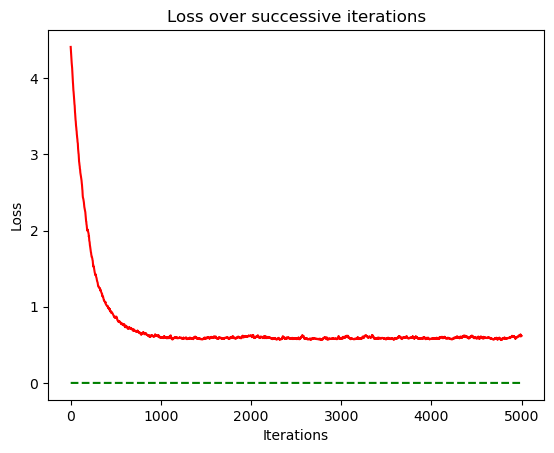

In [32]:
def sgd(K, alpha, theta, loss_tracking=None):
    for _ in range(K):
        ind = np.random.randint(N)  # stochastically choose random index
        theta -= alpha*svm_fi_grad(ind, X, Y, theta)
        if loss_tracking is not None:
            loss_tracking.append(loss_func(X, Y, theta, lam))
    return theta
    
K = 5000    # number of iterations
theta = np.random.randn(p) # randomly sampled initial theta
alpha = 0.01  # learning rate

loss = []
theta = sgd(K, alpha, theta, loss)
print("Optimised theta value:\n", theta)
print(f"Minimised value after {K} iterations with learning rate alpha={alpha}:\n", loss_func(X, Y, theta, lam))

plot_loss(loss)

### Empirical testing for point of non-differentiability 

In [33]:
non_diff_count = 0
num_trials = 1000  # takes around 20s to run 1000 trials (K=5000) on my machine

K = 5000    # number of iterations per trial
alpha = 0.01  # learning rate

for n in range(num_trials):
    print_n = str(n).zfill(4)
    print(f"Trial num: {print_n}/{num_trials}", end="\r")
    
    theta = np.random.randn(p) # randomly sampled initial theta
    try:
        sgd(K, alpha, theta)
    except ZeroDivisionError:
        non_diff_count += 1
        
print(f"A point of non-differentiability was encountered by SGD {non_diff_count} times in {num_trials} trials.")

A point of non-differentiability was encountered by SGD 0 times in 1000 trials.


# Problem 3

Given data

In [34]:
N = 30
np.random.seed(0)
X = np.random.randn(2,N)
y = np.sign(X[0, :]**2 + X[1, :]**2 - 0.7)
theta = 0.5
c, s = np.cos(theta), np.sin(theta)
X = np.array([[c, -s], [s, c]])@X
X = X + np.array([[1] ,[1]])

## Visualise data

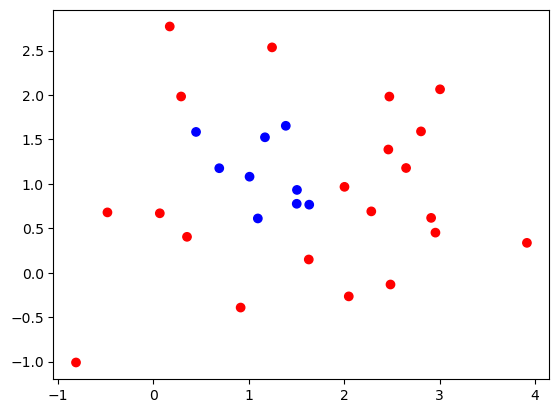

In [35]:
%matplotlib inline
plt.scatter(X[0, :], X[1, :], c=y, cmap='bwr')

# save axes limits to standardise plots for this section to make them easier to compare
x0_min, x0_max = plt.xlim()
x1_min, x1_max = plt.ylim()

plt.show()

Clearly not linearly separable. No linear equation (straight line) can split the blue dots from the red dots completely.

## Apply suggested transformation:

In [36]:
p = 5
phi = np.asarray([[1, u, u**2, v, v**2] for (u, v) in zip(X[0, :], X[1, :])])
phi.shape

(30, 5)

### Apply logistic regression:

In [37]:
K = 50000    # number of iterations
w = np.random.randn(p)
alpha = 0.1  # learning rate

for _ in range(K):
    ind = np.random.randint(N)  # stochastically choose random index
    w -= alpha*log_reg_fi_grad(ind, phi, y, w)

### Visualise results

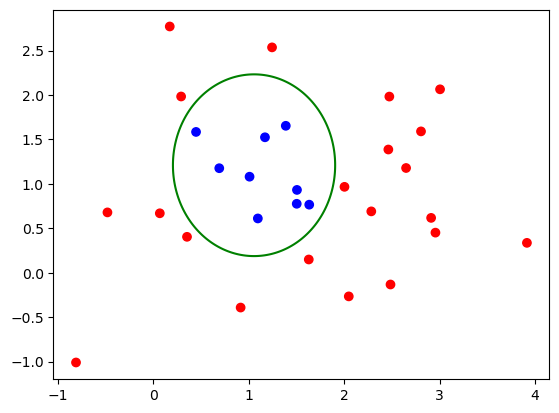

In [38]:
def plot_decision_boundary(boundary_coeff, **kwargs):
    xx = np. linspace (-4, 4, 1024)
    yy = np. linspace (-4, 4, 1024)
    xx, yy = np.meshgrid(xx, yy)
    Z = boundary_coeff[0] + (boundary_coeff[1]*xx + boundary_coeff[2]*xx**2) + (boundary_coeff[3]*yy + boundary_coeff[4]*yy**2)
    plt.contour(xx , yy , Z, 0, **kwargs)

plt.scatter(X[0, :], X[1, :], c=y, cmap='bwr')
plot_decision_boundary(w, colors='g')

# set axes limits to same as earlier plot
plt.xlim(x0_min, x0_max)
plt.ylim(x1_min, x1_max)
plt.show()

Managed to separate the data with a higher-dimensional decision boundary!

### Just for fun (and to check my earlier solutions), apply SVM-based SGD as well:

From my testing, it didn't seem as reliable as logistic regression (or at least requires more hyperparamter work), so 9 different iterations with different randomised starting points are visualised here.

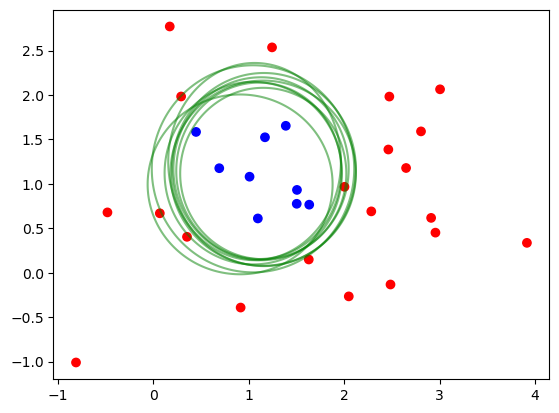

In [39]:
K = 5000
np.random.seed(0)
w = np.random.randn(p)
# tinkered with these values to get an okay result
alpha = 0.01
lam = 0.00267

# Create a list to store the decision boundaries
decision_boundaries = []

# Perform SVM SGD 9 times
for _ in range(9):
    for _ in range(K):
        ind = np.random.randint(N)
        w -= alpha*svm_fi_grad(ind, phi, y, w)
    
    # Append the generated decision boundary from this SGD iteration to the list
    decision_boundaries.append(w.copy())

# Plot the data and the decision boundaries in increasing darkness of green
plt.scatter(X[0, :], X[1, :], c=y, cmap='bwr')
for i, boundary in enumerate(decision_boundaries):
    plot_decision_boundary(boundary, colors="g", alpha=0.5)

# set axes limits to same as earlier plot
plt.xlim(x0_min, x0_max)
plt.ylim(x1_min, x1_max)
plt.show()

# Problem 7

## Setup

Given functions

In [40]:
def f_true(x) :
    return (x-2)*np.cos(x*4)

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x) :
    return sigmoid(x) * (1 - sigmoid(x))

Data initialisation

In [41]:
K = 10000
alpha = 0.007
N, p = 30, 50
np.random.seed(0)
a0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
b0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
u0 = np.random.normal(loc = 0, scale = 0.05, size = p)
theta = np.concatenate((a0,b0,u0))


X = np.random.normal(loc = 0.0, scale = 1.0, size = N)
Y = f_true(X)

Differentials

In [42]:
def f_th(theta, x):
    a = theta[  0 :   p]
    b = theta[  p : 2*p]
    u = theta[2*p : 3*p]
    return np.sum(u * sigmoid(a * np.reshape(x,(-1,1)) + b), axis=1)

def diff_f_th(theta, x):
    a = theta[  0 :   p]
    b = theta[  p : 2*p]
    u = theta[2*p : 3*p]
    ab_shared = sigmoid_prime(a * x + b) * u
    return np.concatenate((
        ab_shared * x,      # grad_a of f_th(x)
        ab_shared,          # grad_b of f_th(x)
        sigmoid(a * x + b)  # grad_u of f_th(x)
    )) 

## Training and plotting

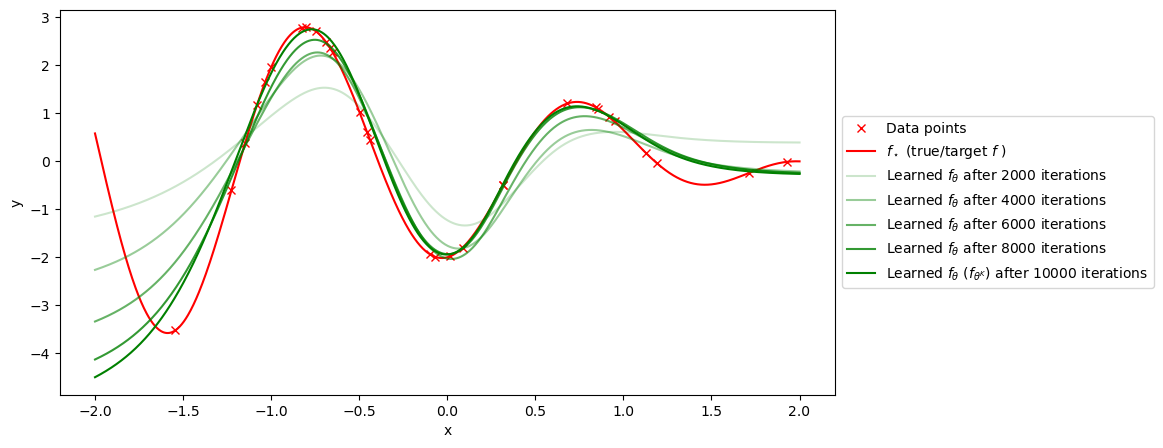

In [43]:
xx = np.linspace(-2,2,1024)

plt.figure(figsize=(10,5))

plt.plot(X,f_true(X),'rx', label='Data points')
plt.plot(xx,f_true(xx),'r', label='$f_\star$ (true/target $f$ )')

for k in range(K) :
    i = np.random.randint(N)
    x, y = X[i], Y[i]
    theta -= alpha * (f_th(theta, x) - y) * diff_f_th(theta, x)
    if (k+1)%2000 == 0:
        f_theta_k_str = " ($f_{\\theta^K}$)"
        plt.plot(xx,f_th(theta, xx), label=f'Learned $f_\\theta${f_theta_k_str if k==K-1 else ""} after {k+1:} iterations', c='g', alpha=(k+1)/K)

# add a legend to the right of the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('x')
plt.ylabel('y')

plt.show()

$f_{\theta^K}$ is closest to $f_\star$ in the region $-1.0 < x < 1.0$ where it has come to match the true value almost exactly after $K$ iterations.

However, outside of this range, $f_{\theta^K}$ has not yet 'fit' fully to $f_\star$, deviating significantly from the true value (most obviously for $x<-1.0$ where the upwards curve of $f_\star$ is not fit at all by $f_{\theta^K}$), although it is clearly improving over successive iterations so further training may improve the match between the two.

This would probably only be true up to a point though and probably still with a range limitation since our 2-layer neural network here, $f_{\theta^K}$, is essentially a kind of formulation of a quadratic(?) Taylor expansion of $f_\star$ I think. So that would only be valid (and hence match the true function well) for some range (which could be deduced analytically by bounding the error term of the expansion).